<h1><center><font color = 'pink'>LENDING CLUB PREDICTION ANALYSIS</center></h1>

<h3><font color= "blue">OBJECTIVES</font></h3>

<ol>
    <li>Predict if loan will default or not.</li>
</ol>

In [1]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import gc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [31]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [35]:
df = pd.read_csv('acceptedLoans.csv')

<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
df.shape

(1187996, 178)

<h1><center><font color = 'green'>DATA CLEANING</font></center></h1>

### Keeping the Relevent Features

In [36]:
list2 = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl',
       'inq_last_12m']

new_df = df[df.columns.intersection(list2)]
df = df[df.columns.intersection(list2)]
df.shape

(2260701, 73)

In [37]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

## Missing Values (Visual Interpretation)

<IPython.core.display.Javascript object>

<AxesSubplot:>

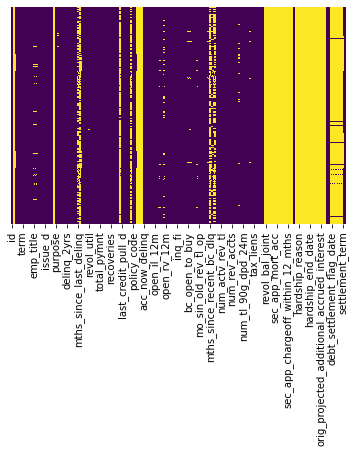

In [26]:
df2 = df.head(10000)
sns.heatmap(df2.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

### Interpretation
It can be visually seen that there are a lot of missing values in the data. These missing values have to be handeled. The following code calculates the percentage of missingness in the data.

In [4]:
def nullValues(df):
    numMissing = df.isnull().sum()
    percentMissing = (100 * numMissing)/len(df)
    concatValues = pd.concat([numMissing,percentMissing],axis = 1)
    
    #Renaming and Sorting the percentage of missing values in non ascending order
    missingRenamed = concatValues.rename(columns = {0:"Missing Values", 1: "Percentage of Missing"})
    missingRenamedSorted = missingRenamed[missingRenamed.iloc[:,1]!=0].sort_values(by = 'Percentage of Missing',ascending = False).round(1) 
    print("LendingClub Data has totally {} coloumns out of which {} coloumns have missing values.".format
          (df.shape[1],missingRenamedSorted.shape[0]))
    return missingRenamedSorted

In [5]:
missingValues = nullValues(df)
missingValues.head(5)

<IPython.core.display.Javascript object>

LendingClub Data has totally 73 coloumns out of which 72 coloumns have missing values.


,Missing Values,Percentage of Missing
member_id,2260701,100.0
verification_status_joint,2144971,94.9
dti_joint,2139995,94.7
annual_inc_joint,2139991,94.7
desc,2134634,94.4


### Delete Coloumns that are missing >60%

In [43]:
numMissing = df.isnull().sum()
percentMissing = (100 * numMissing)/len(df)
    
temp = [i for i in percentMissing > 60]
df.drop(df.columns[temp],axis = 1,inplace = True)


### Delete coloumns with zero variance

In [44]:
counts = df.nunique()

toDelete = [i for i,v in enumerate(counts) if v == 1]
df.drop(df.columns[toDelete],axis = 1,inplace = True)

In [45]:
#df.isna().sum().sort_values(ascending = False )
df.drop(['emp_title','title','zip_code','url'],axis=1,inplace=True)

In [47]:
df.shape

(2260701, 61)

## Delete rows with NA

Cannot delete loan_status column hasving nan values as it is important columns. Since all_util had a huge number of nan values, considered rows with non nan values of this column

In [48]:
df = df[df['all_util'].notna()]

In [49]:
df.shape

(1394320, 61)

The coloumns 'member_id','emp_title','title','zip_code','url' will be deleted

__Loan Default__ occurs when a borrower fails to pay back a debt according to the initial arrangement. In the case of most consumer loans, this means that successive payments have been missed over the course of weeks or months. Fortunately, lenders and loan servicers usually allow a grace period before penalizing the borrower after missing one payment.

Thus targeting "default" values in the 'Loan Status' coloumn as the response variable.

A __charge-off__ is the opposite of paid in full. It means the lender hasn't received payment for at least 180 days, and the account is in default. The lender, or a third-party collection agency, can still come after this kind of debt. Charge-offs have an extremely negative effect on your credit score.

URL : https://budgeting.thenest.com/account-paid-full-vs-chargeoff-23884.html

__Therefore,__<br>
Charged-off and default loans = 1(one category)<br>
rest = 0

In [50]:
df.groupby(['loan_status']).count()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,120089,120089,120089,120089,120089,120089,120089,120089,120089,108765,...,120089,104899,120089,120089,120089,120089,120089,120089,120089,120089
Current,825183,825183,825183,825183,825183,825183,825183,825183,825183,761764,...,825183,699863,825183,825183,825183,825183,825183,825183,825183,825183
Default,38,38,38,38,38,38,38,38,38,33,...,38,31,38,38,38,38,38,38,38,38
Fully Paid,417456,417456,417456,417456,417456,417456,417456,417456,417456,391692,...,417456,360117,417456,417456,417456,417456,417456,417456,417455,417455
In Grace Period,7669,7669,7669,7669,7669,7669,7669,7669,7669,7110,...,7669,6581,7669,7669,7669,7669,7669,7669,7669,7669
Late (16-30 days),4005,4005,4005,4005,4005,4005,4005,4005,4005,3570,...,4005,3387,4005,4005,4005,4005,4005,4005,4005,4005
Late (31-120 days),19880,19880,19880,19880,19880,19880,19880,19880,19880,18099,...,19880,16940,19880,19880,19880,19880,19880,19880,19880,19880


In [51]:
y = []
for i in df['loan_status']:
    if (i == 'Default' or i == 'Charged Off'):
        y.append(1)
    else:
        y.append(0)
df['y'] = y

C:\Users\RUNA\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


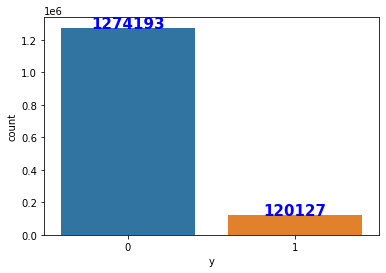

In [52]:
a = sns.countplot(df['y'])

a.set_xticklabels(a.get_xticklabels(),rotation=0)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=15)

## Result: 
The dataset is heavily imbalanced.

In [56]:
df.drop(['loan_status'],axis = 1,inplace = True)

C:\Users\RUNA\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Making a new file


In [57]:
df.to_csv('Level1_Cleaning.csv')

In [38]:
df = pd.read_csv('Level1_Cleaning.csv')
df.drop(['Unnamed: 0', 'id'],axis = 1,inplace = True)

<IPython.core.display.Javascript object>

In [42]:
df.shape


(1394320, 60)

<h1><center><font color = 'green'>EXPLORATORY DATA ANALYSIS</font></center></h1>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Purpose of Taking Loan')

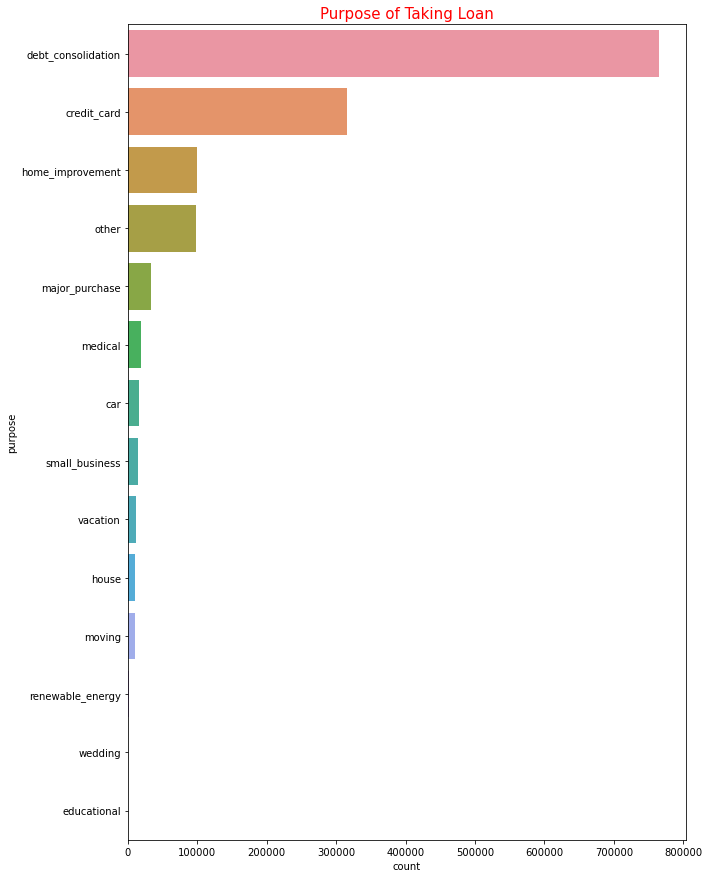

In [43]:
plt.figure(figsize=(10,15))

sns.countplot(y = df['purpose'],order = df['purpose'].value_counts().index)
plt.title('Purpose of Taking Loan',fontsize = 15,color = 'red')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Verification Status')

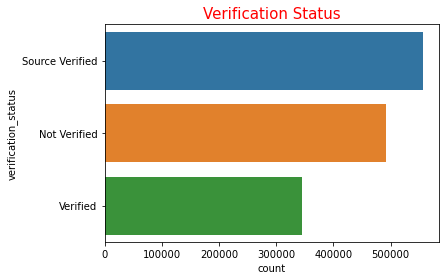

In [193]:
sns.countplot(y = 'verification_status',data = df,order = df['verification_status'].value_counts().index)
plt.title('Verification Status',color = 'red',fontsize = 15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

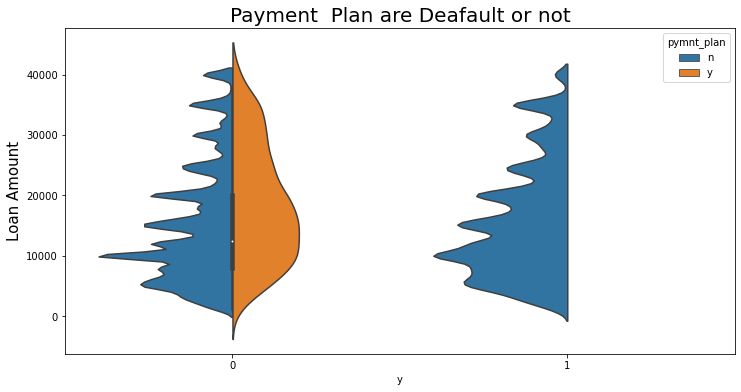

In [199]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="y",y="loan_amnt",data=df, hue="pymnt_plan", split=True)
plt.title("Payment  Plan are Deafault or not", fontsize=20)
plt.ylabel("Loan Amount", fontsize=15);

Borrowers who have no payment plan are more to deafult.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

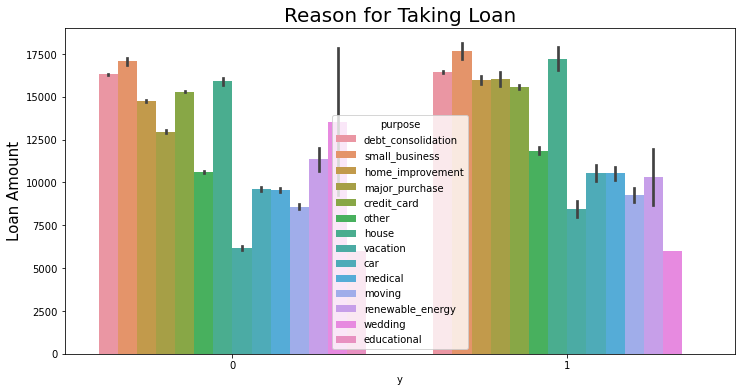

In [44]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x="y",y="loan_amnt",data=df, hue="purpose")
plt.title("Reason for Taking Loan", fontsize=20)
plt.ylabel("Loan Amount", fontsize=15);

Thought that the Debt Consolidation played major role in default of loans. But other purpose also contrbute to default.

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='count', ylabel='grade'>

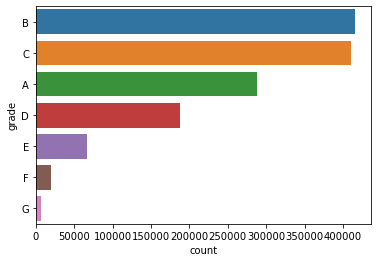

In [217]:
sns.countplot(y = 'grade',data = df,order = df['grade'].value_counts().index)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

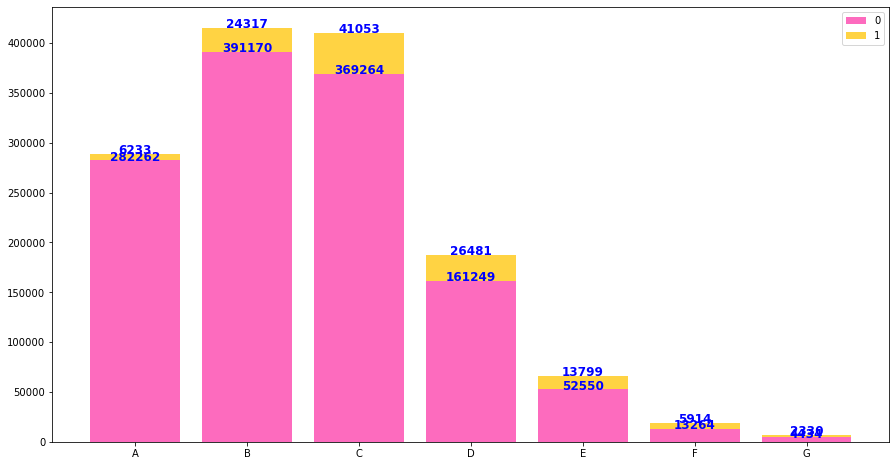

In [251]:
agg_grade = df.groupby(['grade', 'y'])['loan_amnt'].count().unstack().fillna(0)

fig, ax = plt.subplots(figsize = (15,8))

colors = ['#fd6bbe','#ffd343']
bottom = np.zeros(len(agg_grade))

for i, col in enumerate(agg_grade.columns):
    ax.bar(agg_grade.index, agg_grade[col], bottom=bottom, label=col, color=colors[i])
    bottom += np.array(agg_grade[col])

totals = agg_grade.sum(axis=1)

y_offset = 1
for bar in ax.patches:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + bar.get_y() + y_offset,
      round(bar.get_height()),
      ha='center',
      color='b',
      weight='bold',
      size=12
  )

ax.legend()


In [5]:
df['issue_d']= pd.to_datetime(df['issue_d']).apply(lambda x: int(x.strftime('%Y')))

<IPython.core.display.Javascript object>

### Filling na with the highest count and converting data tyes

In [45]:
#nf = df.groupby(['last_pymnt_d']).count()
#nf['loan_amnt'].sort_values(ascending = False)
df['last_pymnt_d']= pd.to_datetime(df['last_pymnt_d'].fillna('Mar-2019')).apply(lambda x: int(x.strftime('%m')))

<IPython.core.display.Javascript object>

In [46]:
#nf = df.groupby(['last_credit_pull_d']).count()
#nf['loan_amnt'].sort_values(ascending = False)
df['last_credit_pull_d']= pd.to_datetime(df['last_credit_pull_d'].fillna("Mar-2019")).apply(lambda x: int(x.strftime('%m')))

<IPython.core.display.Javascript object>

In [47]:
#nf = df.groupby(['earliest_cr_line']).count()
#nf['loan_amnt'].sort_values(ascending = False)
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'].fillna('Sep-2005')).apply(lambda x: int(x.strftime('%m')))

<IPython.core.display.Javascript object>

In [48]:
#nf = df.groupby(['next_pymnt_d']).count()
#nf['loan_amnt'].sort_values(ascending = False)
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'].fillna(value = 'Apr-2019')).apply(lambda x:int(x.strftime("%Y")))

<IPython.core.display.Javascript object>

## Handeling Categorical Data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Data type')

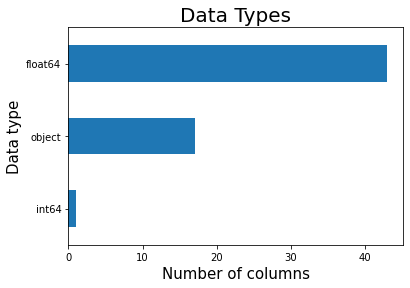

In [133]:
#df.drop(['loan_status'],axis = 1,inplace = True)
df.dtypes.value_counts().sort_values().plot(kind = 'barh')
plt.title('Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)


<ol>
    <li>For variables with just 2 categories label encoding technique is used.</li>
    <li>For variables with > 2 categories one hot encoding technique is used.</li>

In [13]:
count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            df[col] = le.fit_transform(df[col])
            count += 1
            print (col)
            
print('%d columns were label encoded.' % count)

term
pymnt_plan
initial_list_status
application_type
4 columns were label encoded.


In [17]:
df = pd.get_dummies(df)
print(df.shape)

<IPython.core.display.Javascript object>

(1394320, 178)


### mths_since_last_delinq

<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mths_since_last_delinq', ylabel='Density'>

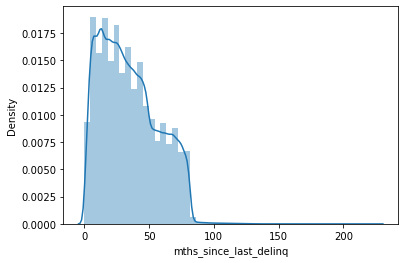

In [18]:
sns.distplot(df['mths_since_last_delinq'])

 Since mths_since_last_delinq is skewed will use median for imputation

In [19]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median())

## Dropping all na values

In [20]:
df.dropna(inplace=True)
df.shape

(1187996, 178)

In [21]:
df['y'].value_counts()

0    1083458
1     104538
Name: y, dtype: int64

<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

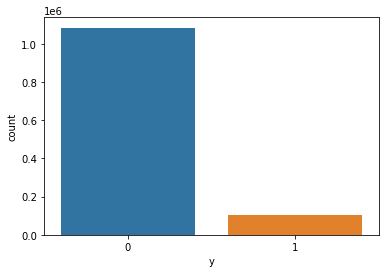

In [119]:
sns.countplot(df['y'])

## Model Fitting

In [22]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        #print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        #print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    


### Splitting the Data

Adding stratified

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y',axis=1),df['y'],test_size=0.2,random_state=101)

### Freeing the memory

In [33]:
gc.collect()

154

### Standarding by using mean and scaling to unit variance

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Handling Imbalance using Synthetic Minority Oversampling Technique

In [28]:
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_r, y_train_r = sm.fit_sample(X_train, y_train)

### Model Building

In [29]:
log_reg = LogisticRegression(C = 0.0001,random_state=21)
log_reg.fit(x_train_r, y_train_r)

LogisticRegression(C=0.0001, random_state=21)

In [ ]:
print_score(log_reg, x_train_r, y_train_r, X_test, y_test)

Train Result:

accuracy score: 0.9846

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98    866640
           1       0.99      0.98      0.98    866640

    accuracy                           0.98   1733280
   macro avg       0.98      0.98      0.98   1733280
weighted avg       0.98      0.98      0.98   1733280


Confusion Matrix: 
 [[854897  11743]
 [ 14909 851731]]

